# GRIP : SPARKS FOUNDATION

# Data science and Business Analytics internship

# Author : M.B.Sanju Vikasini

# TASK 2:Unsupervised Machine Learning

From the given "iris" dataset, predict the optimum number of clusters and represent it visually

This task involves clustering

# STEP 1:Import the libraries

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wg 
wg.filterwarnings("ignore")
%matplotlib inline


# STEP 2:Import the dataset

In [151]:
df = pd.read_csv("Iris.csv")

In [152]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [153]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [154]:
df = df.drop(columns = ['Id'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [156]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [157]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [158]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [159]:
df["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

# STEP 3:Exploratory Data Analysis

<AxesSubplot:>

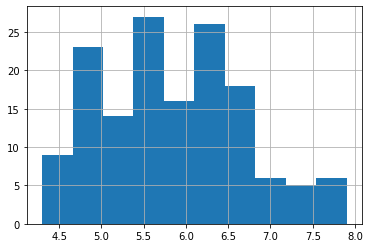

In [192]:
#Construction of Histograms for each attribute
df["SepalLengthCm"].hist()

<AxesSubplot:>

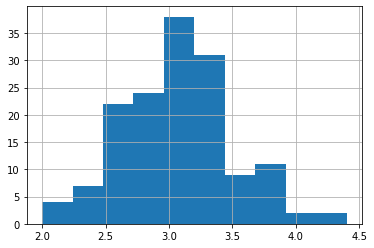

In [161]:
df["SepalWidthCm"].hist()

<AxesSubplot:>

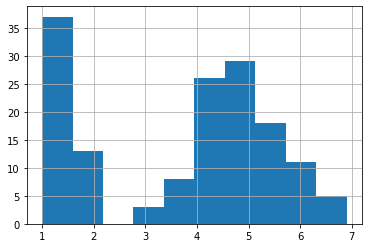

In [162]:
df["PetalLengthCm"].hist()

<AxesSubplot:>

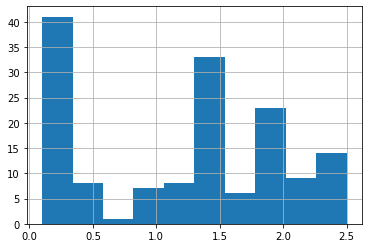

In [163]:
df["PetalWidthCm"].hist()

In [164]:
#Correlation matrix - Displays inter-relationship between two features using heatmap
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

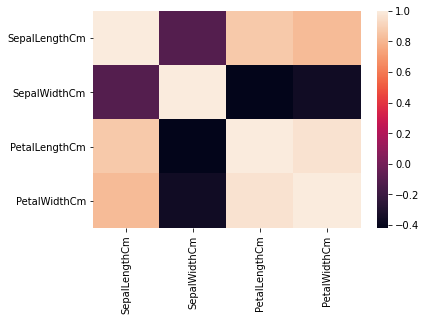

In [165]:
sns.heatmap(df.corr())

# STEP 4:Label encoder

Label encoder converts labels to numeric form

In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [168]:

df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# STEP 5:Finding optimum number of clusters

k means-clustering : Aims to partition 'n' observations into 'k' clusters


The optimum number of clusters(k) is found using elbow method

WSS plot - Within sum of squares plot ; x - axis : Number of clusters ;y - axis : Values of Sum of squared errors.Sum of squared error is the distance of each data point in cluster from the centroid
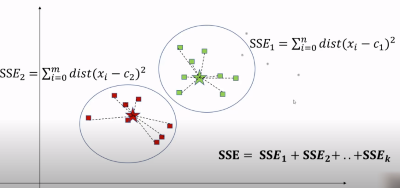

In [169]:
#Calculating within cluster sum of square
from sklearn.cluster import KMeans
within_cluster_sum_of_square = []
clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    within_cluster_sum_of_square.append(km.inertia_)

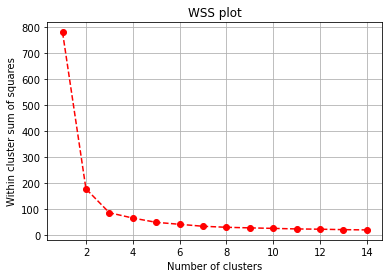

In [170]:
#Plotting WSS plot
plt.plot(clusters_range,within_cluster_sum_of_square,'ro--',color="red")
plt.title("WSS plot")
plt.xlabel("Number of clusters")
plt.ylabel("Within cluster sum of squares")
plt.grid()

The kink at the elbow gives the optimum number of clusters. In this, case optimum number of clusters is 3

The WSS plot line becomes constant after the kink

# STEP 6:Applying k means clustering on the data

In [171]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
predictions = model.fit_predict(df)

In [172]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [173]:
df['cluster'] = predictions
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


# STEP 7:Visualising the clusters

In [178]:
df['Species'] = le.inverse_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


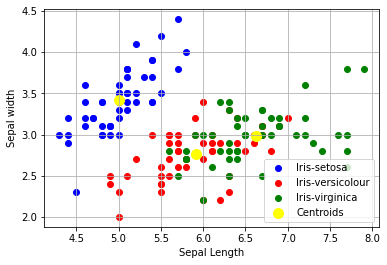

In [193]:
x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 1],  c = 'blue', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 1],  c = 'red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 1],  c = 'green', label = 'Iris-virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")

# Plotting the centroids of each cluster

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()


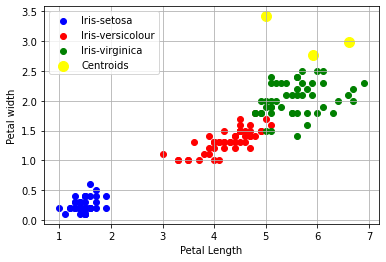

In [194]:
x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 2], x[predictions == 0, 3],  c = 'blue', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 2], x[predictions == 1, 3],  c = 'red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 2], x[predictions == 2, 3],  c = 'green', label = 'Iris-virginica')
plt.xlabel("Petal Length")
plt.ylabel("Petal width")

# Plotting the centroids of each cluster

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()

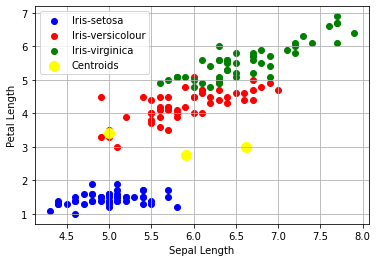

In [195]:
x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 0], x[predictions == 0, 2],  c = 'blue', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 0], x[predictions == 1, 2],  c = 'red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 0], x[predictions == 2, 2],  c = 'green', label = 'Iris-virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

# Plotting the centroids of each cluster

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()

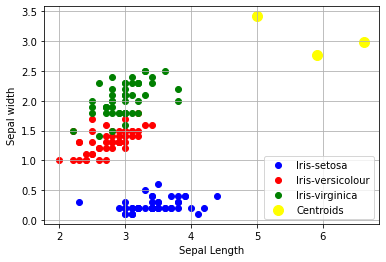

In [196]:
x = df.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions == 0, 1], x[predictions == 0, 3],  c = 'blue', label = 'Iris-setosa')
plt.scatter(x[predictions == 1, 1], x[predictions == 1, 3],  c = 'red', label = 'Iris-versicolour')
plt.scatter(x[predictions == 2, 1], x[predictions == 2, 3],  c = 'green', label = 'Iris-virginica')
plt.xlabel("Sepal Length")
plt.ylabel("Sepal width")

# Plotting the centroids of each cluster

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()